In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tabela = pd.read_csv(r"Tabelas\country_vaccinations.csv")
tabela.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
1  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
2  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
3  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
4  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...

# Total de vacinados

In [3]:
total = tabela['people_vaccinated'] + tabela['people_fully_vaccinated']
total.sum()

272233661668.0

# Total de vacinados por país

In [4]:
g = tabela[['country', 'total_vaccinations']].query("country == 'China'")
g['total_vaccinations'].sum()


164350092700.0

In [5]:
lista_nomes = []
lista_numeros = []

for i in tabela['country'].unique():
    g = tabela[['country', 'total_vaccinations']].query(f'country == "%s"' % i)
    g_sum = g['total_vaccinations'].sum()
    lista_nomes.append(i)
    lista_numeros.append(g_sum)

totalDeVacinados = pd.DataFrame(lista_nomes, columns=['Paises'])
totalDeVacinados['Vacinados'] = lista_numeros
totalDeVacinados.head()

Paises    Vacinados
0  Afghanistan   18162784.0
1      Albania  101509950.0
2      Algeria   12221121.0
3      Andorra     933237.0
4       Angola   28789948.0

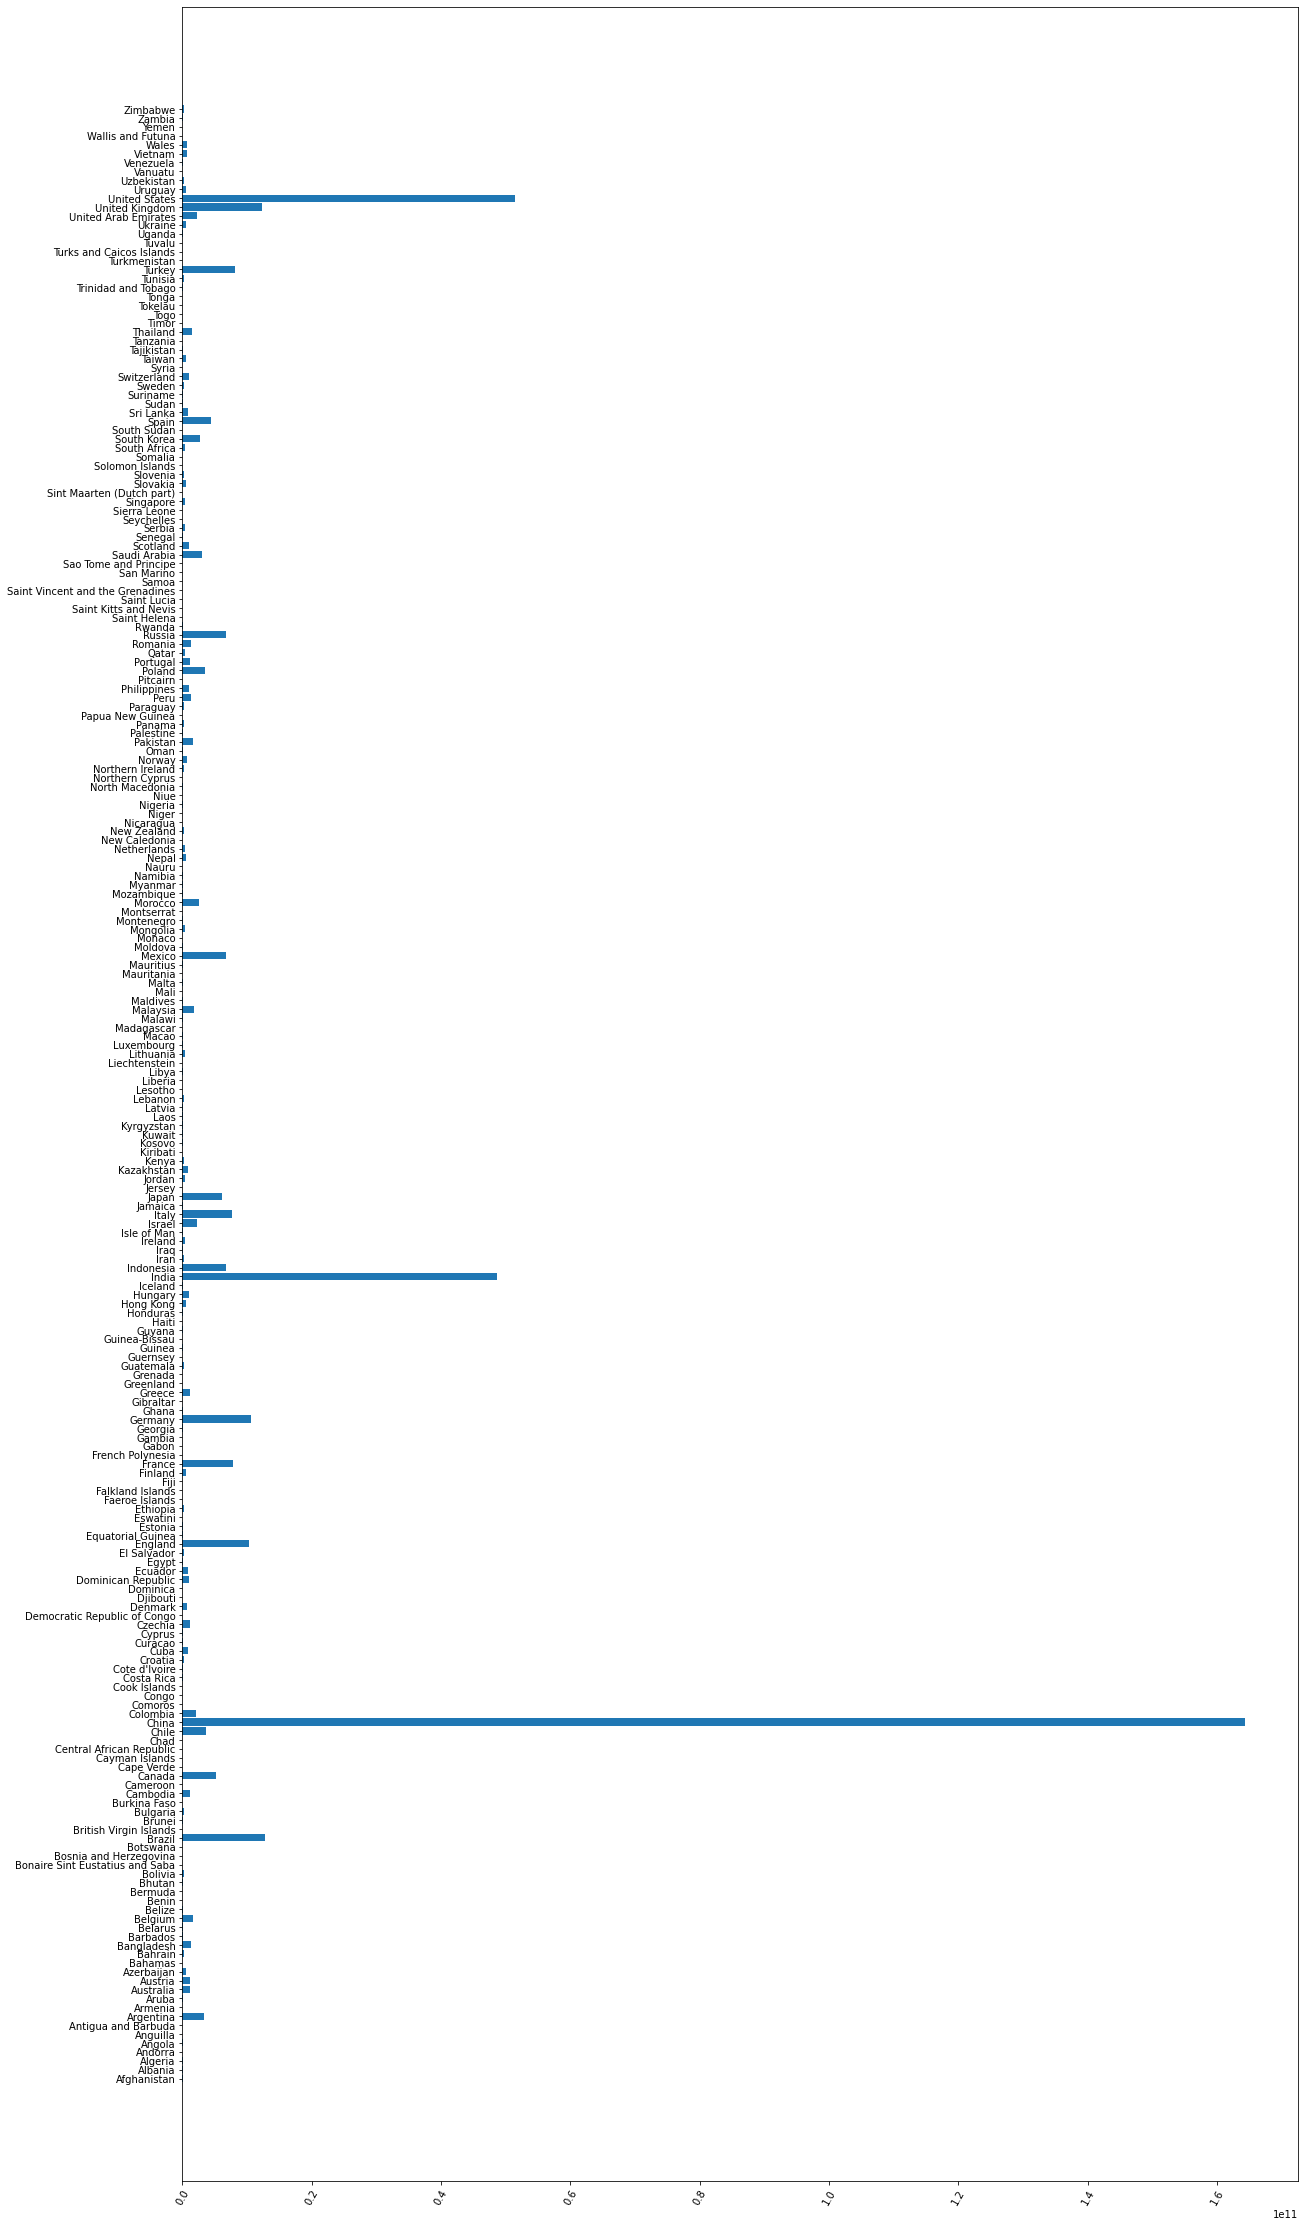

In [6]:
plt.figure(figsize=(20, 40))
plt.barh(totalDeVacinados['Paises'], totalDeVacinados['Vacinados'])
plt.xticks(rotation=60)
plt.show()

In [7]:
totalDeVacinados.sort_values(by='Vacinados', ascending=False).head(10)

Paises     Vacinados
40            China  1.643501e+11
211   United States  5.141112e+10
90            India  4.861371e+10
27           Brazil  1.276655e+10
210  United Kingdom  1.237491e+10
74          Germany  1.057481e+10
60          England  1.034379e+10
203          Turkey  8.150958e+09
69           France  7.876517e+09
97            Italy  7.631504e+09

O Brasil está entre os 10 países que mais aplicaram a vacina.

# Os 10 países que mais aplicaram a vacina

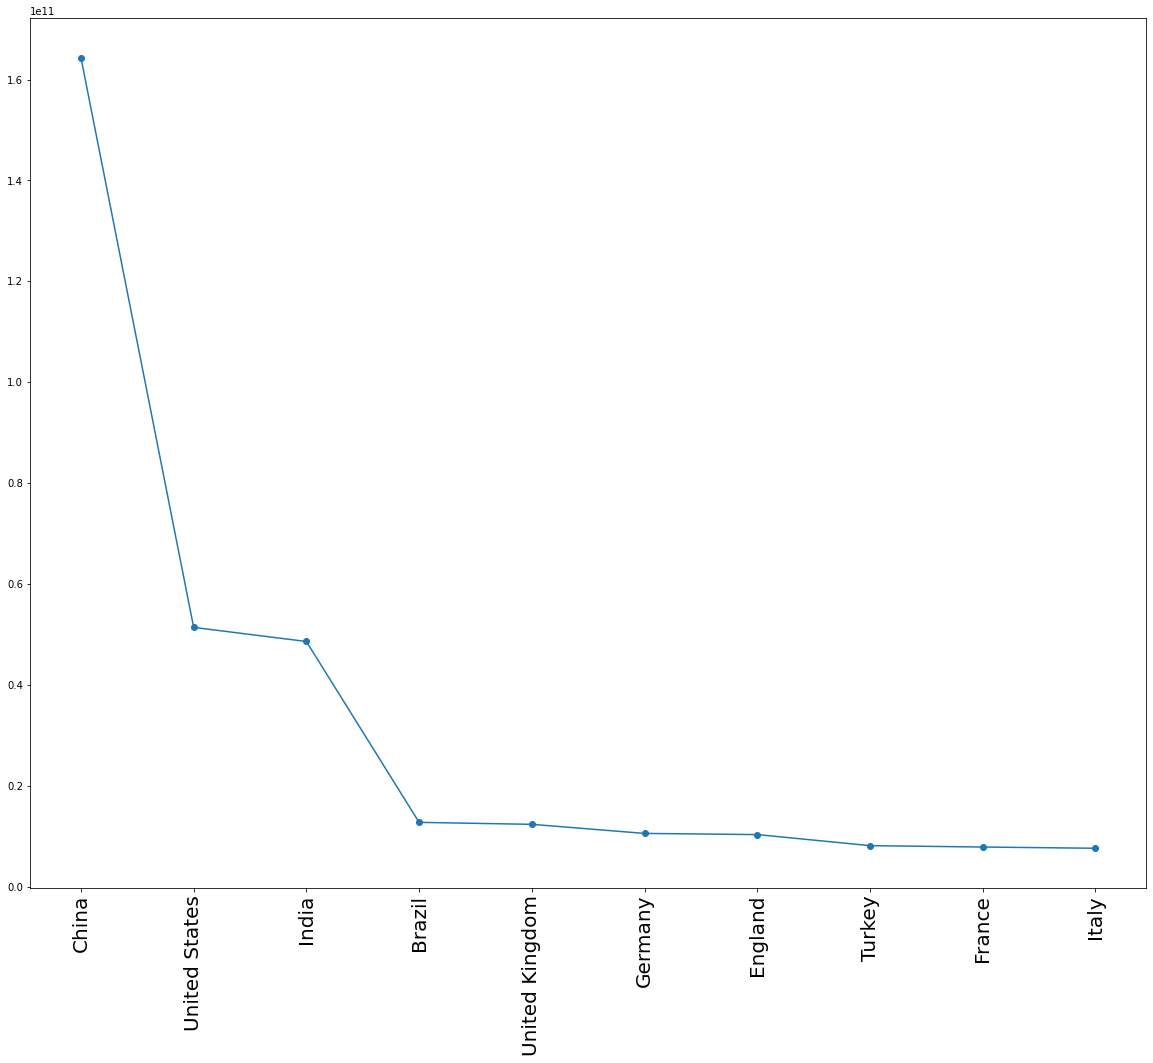

In [8]:
plt.figure(figsize=(20, 16))
x = totalDeVacinados.sort_values(by='Vacinados', ascending=False).head(10)
plt.plot(x['Paises'], x['Vacinados'], 'o-')
plt.xticks(rotation=90, size=20)
plt.show()

# Total de pessoas vacinadas por país (people_vaccinated)

In [9]:
lista_nomes = []
lista_numeros = []

for i in tabela['country'].unique():
    g = tabela[['country', 'people_vaccinated']].query(f'country == "%s"' % i)
    g_sum = g['people_vaccinated'].sum()
    lista_nomes.append(i)
    lista_numeros.append(g_sum)

totalDeVacinados = pd.DataFrame(lista_nomes, columns=['Paises'])
totalDeVacinados['Vacinados'] = lista_numeros
totalDeVacinados.head()

Paises   Vacinados
0  Afghanistan  10866939.0
1      Albania  51108361.0
2      Algeria   8496309.0
3      Andorra    574325.0
4       Angola  18887321.0

*Os 10 com maiores números de pessoas vacinadas*

In [10]:
totalDeVacinados.sort_values(by='Vacinados', ascending=False).head(10)

Paises     Vacinados
90            India  3.870791e+10
211   United States  2.985933e+10
27           Brazil  9.058373e+09
210  United Kingdom  7.875440e+09
60          England  6.602047e+09
74          Germany  6.502627e+09
69           France  4.923099e+09
203          Turkey  4.738457e+09
126          Mexico  4.716390e+09
97            Italy  4.705760e+09

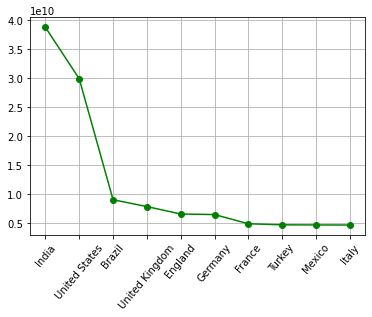

In [11]:
x = totalDeVacinados.sort_values(by='Vacinados', ascending=False).head(10)
plt.plot(x['Paises'], x['Vacinados'], 'go-')
plt.xticks(rotation=50)
plt.grid(True)

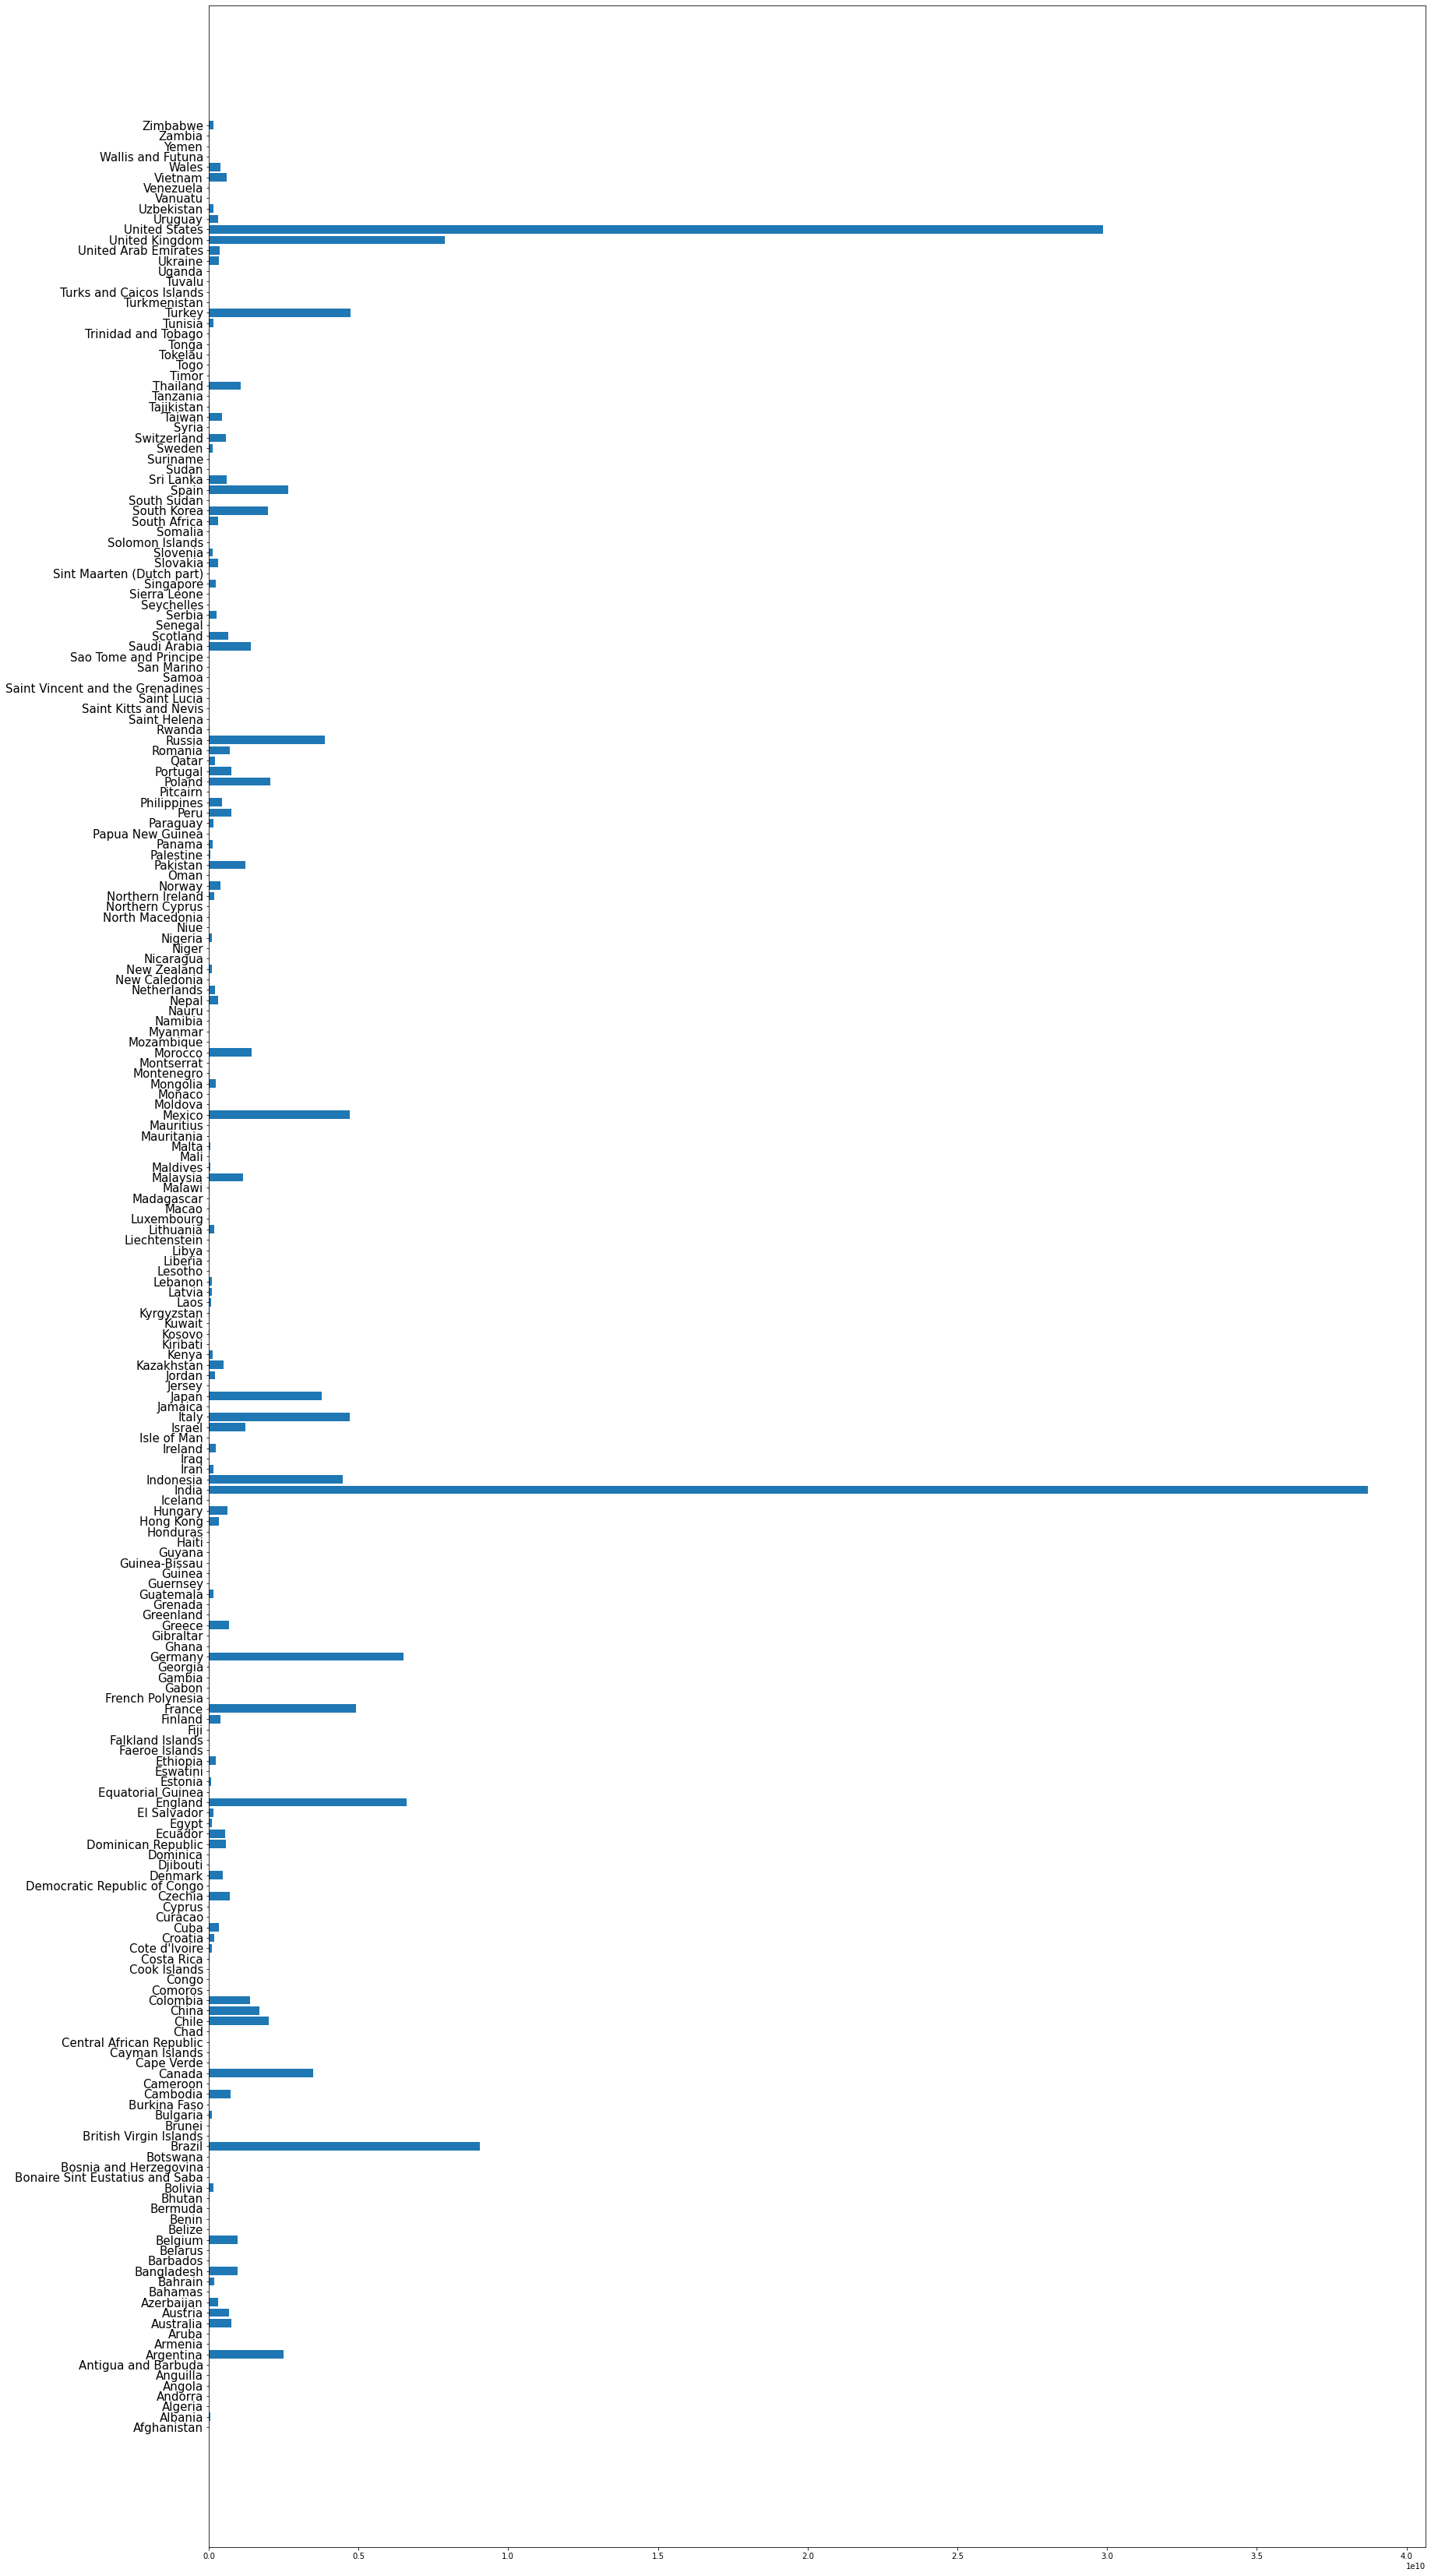

In [36]:
plt.figure(figsize=(28, 60))
plt.barh(totalDeVacinados['Paises'], totalDeVacinados['Vacinados'])
plt.yticks(rotation=0, size=15)
plt.show()

# Analisando a variável total_vaccinations_per_hundred

In [39]:
lista_nomes = []
lista_numeros = []

for i in tabela['country'].unique():
    g = tabela[['country', 'total_vaccinations_per_hundred']].query(f'country == "%s"' % i)
    g_sum = g['total_vaccinations_per_hundred'].sum()
    lista_nomes.append(i)
    lista_numeros.append(g_sum)

total_hundred = pd.DataFrame(lista_nomes, columns=['Paises'])
total_hundred['Vacinados'] = lista_numeros
total_hundred.head()

Paises  Vacinados
0  Afghanistan      45.62
1      Albania    3533.28
2      Algeria      27.39
3      Andorra    1206.46
4       Angola      84.85

### Os 10 maiores vacinados por centenas

In [42]:
total_hundred.sort_values(by='Vacinados', ascending=False).head(10)

Paises  Vacinados
96                 Israel   26340.06
209  United Arab Emirates   22978.64
217                 Wales   19871.64
76              Gibraltar   19407.12
172              Scotland   18855.47
123                 Malta   18645.11
39                  Chile   18623.20
60                England   18291.40
210        United Kingdom   18143.11
14                Bahrain   17763.41

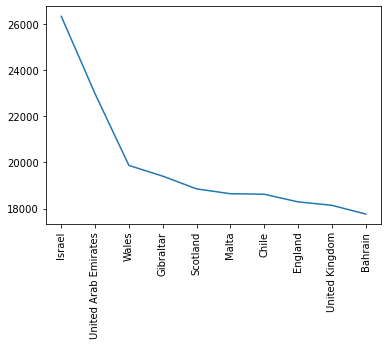

In [47]:
x = total_hundred.sort_values(by='Vacinados', ascending=False).head(10)
plt.plot(x['Paises'], x['Vacinados'])
plt.xticks(rotation=90)
plt.show()

In [64]:
plt.figure(figsize=(60,30), dpi=300)
plt.plot(total_hundred['Paises'], total_hundred['Vacinados'])
plt.xticks(rotation=90, size=20)
plt.show()

# Quais foram os fabricantes de vacinas mais aplicados?

In [78]:
print(tabela['vaccines'].unique(), end="\n")


['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V'
 'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V'
 'Oxford/AstraZeneca, Pfizer/BioNTech' 'Oxford/AstraZeneca'
 'Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V'
 'Oxford/AstraZeneca, Sinovac, Sputnik V' 'Pfizer/BioNTech'
 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'
 'Sinopharm/Beijing, Sputnik V' 'Oxford/AstraZeneca, Sinopharm/Beijing'
 'Oxford/AstraZeneca, Sinovac'
 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'
 'Moderna, Pfizer/BioNTech'
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'
 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'
 'Johnson&Johnson, Oxford/AstraZene